In [1]:
spark

Intitializing Scala interpreter ...

Spark Web UI available at http://localhost:4040
SparkContext available as 'sc' (version = 2.3.2, master = local[*], app id = local-1542795175477)
SparkSession available as 'spark'


res0: org.apache.spark.sql.SparkSession = org.apache.spark.sql.SparkSession@597ada72


In [2]:
%run "src/scala/register_tables.scala"

In [3]:
register_prescription(spark, "spark-warehouse/")

===Prescription dataset===
registering patients
registering prescriptions
registering drugs
ok


In [4]:
spark.sql("show tables").show(false)

+--------+--------------------------+-----------+
|database|tableName                 |isTemporary|
+--------+--------------------------+-----------+
|        |prescription_drugs        |true       |
|        |prescription_patients     |true       |
|        |prescription_prescriptions|true       |
+--------+--------------------------+-----------+



In [32]:
val prescriptions = spark.sql("select * from prescription_prescriptions")
prescriptions.select("timestamp", "drugcode").show(5)

+-------------------+--------+
|          timestamp|drugcode|
+-------------------+--------+
|2011-05-12 00:00:00| R03BA05|
|2011-07-04 00:00:00| L04AX01|
|2014-03-22 00:00:00| R03BA05|
|2014-11-10 00:00:00| M01AE01|
|2013-06-21 00:00:00| J01AA02|
+-------------------+--------+
only showing top 5 rows



prescriptions: org.apache.spark.sql.DataFrame = [id: string, timestamp: timestamp ... 1 more field]


In [43]:
prescriptions
    .where(col("timestamp").gt(lit("2006-01-01")))
    .where(col("timestamp").lt(lit("2012-01-01")))
    .select(weekofyear(col("timestamp")).as("weekofyear"))
    .groupBy("weekofyear").count
    .sort(asc("weekofyear"))
    .createOrReplaceTempView("pres_by_weekofyear")


/*
val date = lit("2013.01.01")
println(date)
*/

In [44]:
%%python
import pandas as pd
import matplotlib.pyplot as plt
from src.python.helpers import plotfig_magic
import numpy as np
from IPython.display import Image
import tempfile

In [45]:
%%python
pres_by_weekofyear = spark.sql("select * from pres_by_weekofyear").toPandas()[:52]


In [46]:
%%python
print(pres_by_weekofyear[:5])

   weekofyear    count
0           1  2774319
1           2  3225928
2           3  3348481
3           4  3493417
4           5  3480701


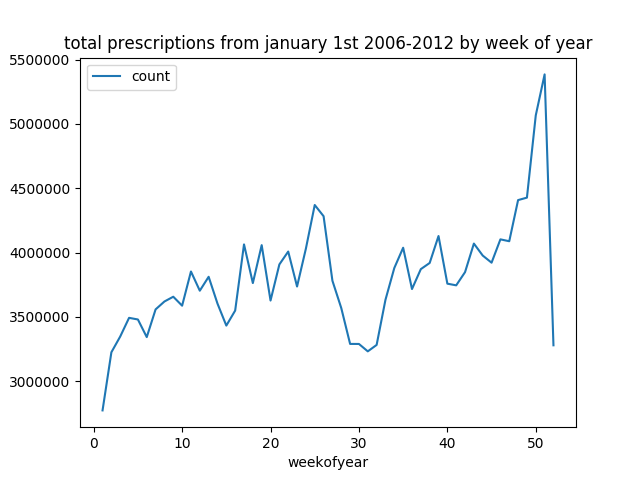

In [48]:
%%python
plt.clf()
pres_by_weekofyear.plot(x="weekofyear",y="count")
plt.title("total prescriptions from january 1st 2006-2012 by week of year")
retval = plotfig_magic()